# `classification.XGBoostClassifier`

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [35]:
from slickml.classification import XGBoostClassifier

help(XGBoostClassifier)

Help on class XGBoostClassifier in module slickml.classification._xgboost:

class XGBoostClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
 |  XGBoostClassifier(num_boost_round: Optional[int] = 200, metrics: Optional[str] = 'auc', sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict] = None) -> None
 |  
 |  XGBoost Classifier.
 |  
 |  This is wrapper using XGBoost classifier to train a XGBoost [1]_ model using the number of
 |  boosting rounds from the inputs. This is also the base class for ``XGBoostCVClassifier``.
 |  
 |  Parameters
 |  ----------
 |  num_boost_round : int, optional
 |      Number of boosting rounds to fit a model, by default 200
 |  
 |  metrics : str, optional
 |      Metrics to be tracked at fitting time with possible values of "auc", "aucpr", "error",
 |      "logloss". Note this is different than `eval_metric` that n

### Example 1: `XGBoostClassifer` mode for `breast-cancer` data set

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [37]:
# custom params
params = {
    "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
clf = XGBoostClassifier(
    num_boost_round=333,
    metrics="logloss",
    params=params,
)
clf.fit(X_train, y_train)

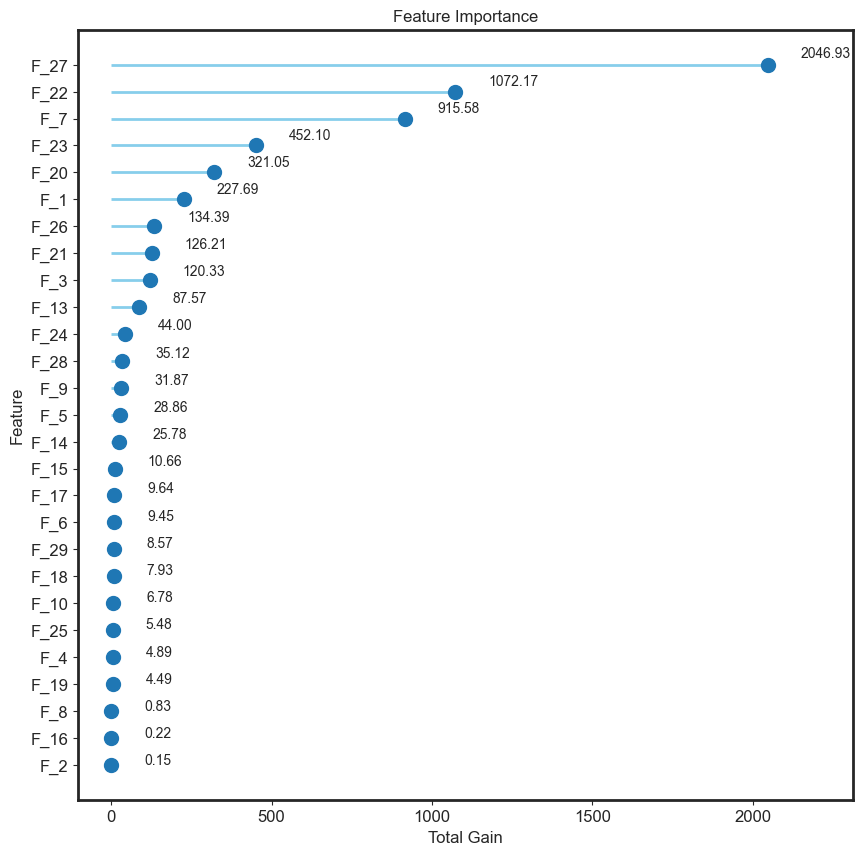

In [38]:
clf.plot_feature_importance(figsize=(10, 10))

In [39]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([0.9996685 , 0.12912115, 0.9989581 , 0.9983791 , 0.9995352 ,
       0.00763281, 0.9966325 , 0.9874792 , 0.9998416 , 0.999087  ],
      dtype=float32)

In [40]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

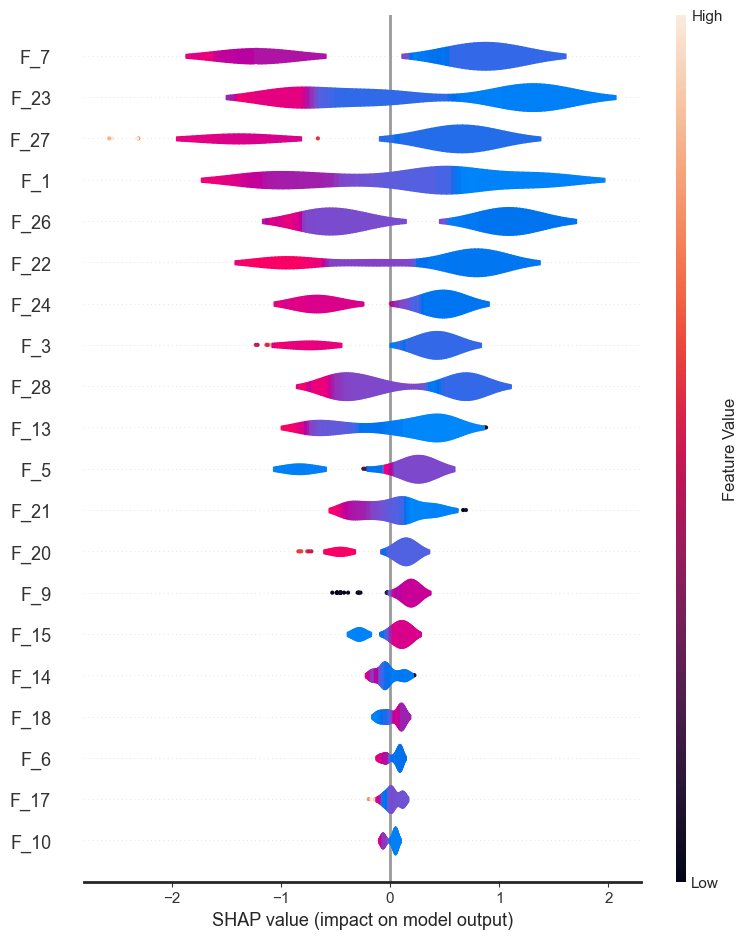

In [41]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

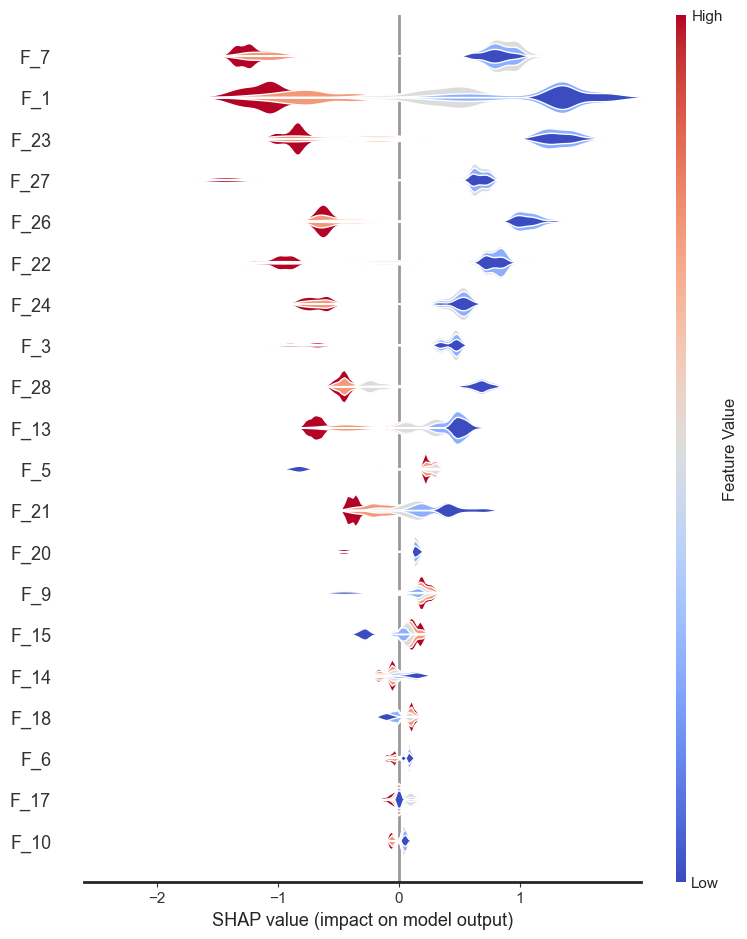

In [42]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

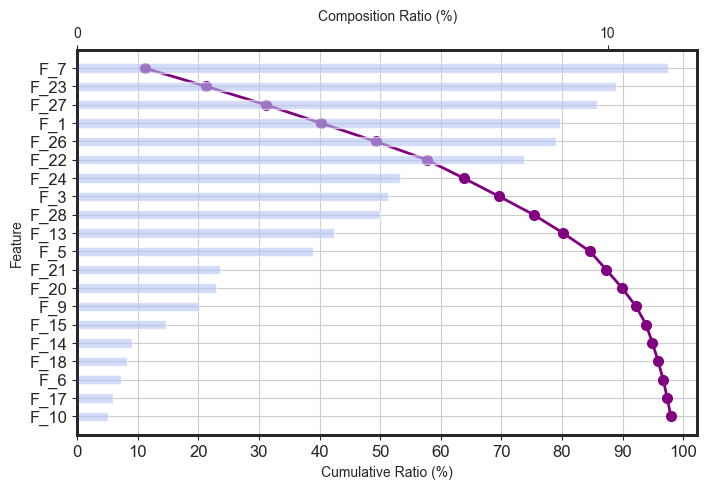

In [43]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [44]:
clf.shap_values_test_[:10]

array([[ 0.00000000e+00,  1.07446039e+00,  2.73985113e-03,
         4.71503317e-01,  5.75528294e-02,  2.63237208e-01,
        -8.72399583e-02,  7.99881756e-01, -4.23611775e-02,
         1.27631441e-01,  3.65984552e-02,  0.00000000e+00,
         0.00000000e+00,  3.22267354e-01, -5.68793714e-02,
         1.30775362e-01, -1.06775658e-02, -6.08294308e-02,
         8.66456404e-02,  2.77170725e-03,  1.81955516e-01,
         4.28092867e-01,  7.22599626e-01,  1.34873462e+00,
         5.48167527e-01,  4.79263663e-02, -5.34638941e-01,
         7.01983750e-01,  5.88663518e-01, -6.20898139e-03],
       [ 0.00000000e+00,  8.62370953e-02,  7.88367260e-03,
         3.68633121e-01, -6.00543693e-02, -2.45133847e-01,
         1.03722736e-01,  1.01622450e+00, -4.23611775e-02,
         2.14039125e-02, -5.41331060e-02,  0.00000000e+00,
         0.00000000e+00, -3.98101449e-01, -2.42329780e-02,
        -2.81728476e-01,  1.67147478e-03,  1.13975339e-01,
        -2.40540579e-02, -5.41663095e-02, -7.21290290e-

In [45]:
clf.shap_values_train_[:10]

array([[ 0.        ,  0.7233305 ,  0.00273985,  0.41659182,  0.06413037,
        -0.90704423,  0.0890573 ,  0.84709865, -0.03102471, -0.45277628,
         0.04393489,  0.        ,  0.        ,  0.27228096,  0.0950158 ,
        -0.28947246,  0.00167147,  0.01183199, -0.10798451, -0.01660636,
         0.13596696,  0.04432356,  0.6928667 , -0.11552715,  0.48577213,
         0.04792637,  1.2685175 ,  0.69229066,  0.7865005 , -0.00620898],
       [ 0.        , -1.1267805 , -0.00847389, -0.698691  , -0.07118876,
         0.25013694, -0.04237051, -1.2131369 , -0.02441495,  0.15943936,
        -0.08349588,  0.        ,  0.        , -0.7122795 , -0.17908527,
         0.18042202,  0.00167147, -0.12987727,  0.10656785,  0.06191153,
        -0.4494603 , -0.32438272, -0.8690689 , -0.80038047, -0.5080572 ,
         0.02572181, -0.30278337, -1.3879391 ,  0.68485165, -0.00267589],
       [ 0.        ,  0.25977474, -0.00294497, -0.6233862 , -0.04941916,
         0.19912757, -0.09288128, -1.3361809 ,  0

In [46]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F_27,2046.929199
1,F_22,1072.174683
2,F_7,915.584534
3,F_23,452.102264
4,F_20,321.053192
5,F_1,227.690979
6,F_26,134.388840
7,F_21,126.208862
8,F_3,120.325699
9,F_13,87.571632


In [47]:
clf.model_